### Phishing Website Detection By Machine Learning Techniques

#### Objective:

A phishing website is a common social engineering method that mimics trustful uniform resource locators (URLs) and webpages. The objective of this project is to train machine learning models on the dataset created to predict phishing websites. Both phishing and benign URLs of websites are gathered to form a dataset and from them required URL and website content-based features are extracted. The performance level of each model is measures and compared.

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [74]:
# Loading Dataset
df = pd.read_csv('5.urldata.csv')

In [10]:
df.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
4,icicibank.com,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0


In [11]:
df.shape

(10000, 18)

In [12]:
df.columns

Index(['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth',
       'Redirection', 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record',
       'Web_Traffic', 'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over',
       'Right_Click', 'Web_Forwards', 'Label'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Domain         10000 non-null  object
 1   Have_IP        10000 non-null  int64 
 2   Have_At        10000 non-null  int64 
 3   URL_Length     10000 non-null  int64 
 4   URL_Depth      10000 non-null  int64 
 5   Redirection    10000 non-null  int64 
 6   https_Domain   10000 non-null  int64 
 7   TinyURL        10000 non-null  int64 
 8   Prefix/Suffix  10000 non-null  int64 
 9   DNS_Record     10000 non-null  int64 
 10  Web_Traffic    10000 non-null  int64 
 11  Domain_Age     10000 non-null  int64 
 12  Domain_End     10000 non-null  int64 
 13  iFrame         10000 non-null  int64 
 14  Mouse_Over     10000 non-null  int64 
 15  Right_Click    10000 non-null  int64 
 16  Web_Forwards   10000 non-null  int64 
 17  Label          10000 non-null  int64 
dtypes: int64(17), object(1)
mem

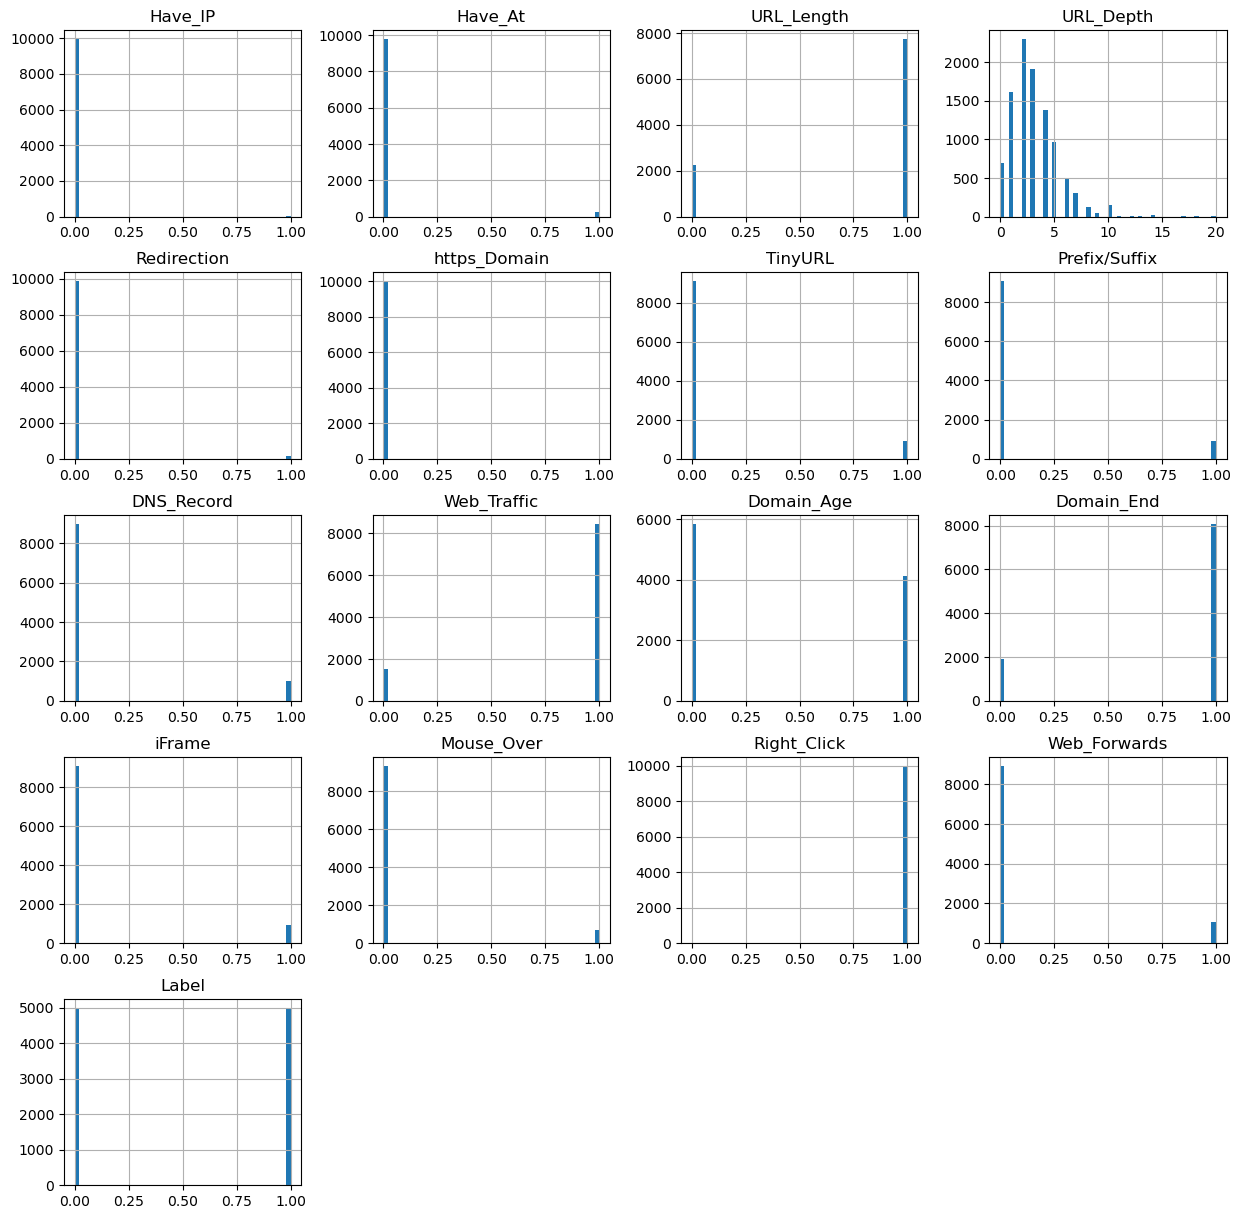

In [14]:
# Visualize the dataset
df.hist(bins=50, figsize=(15,15))
plt.show()

In [15]:
df['Label'].value_counts()

Label
0    5000
1    5000
Name: count, dtype: int64

The Domain column doesnt have any significance to the machine learning model training. So dropping the 'Domain' column from the dataset.

In [17]:
df.drop('Domain', axis=1, inplace=True)

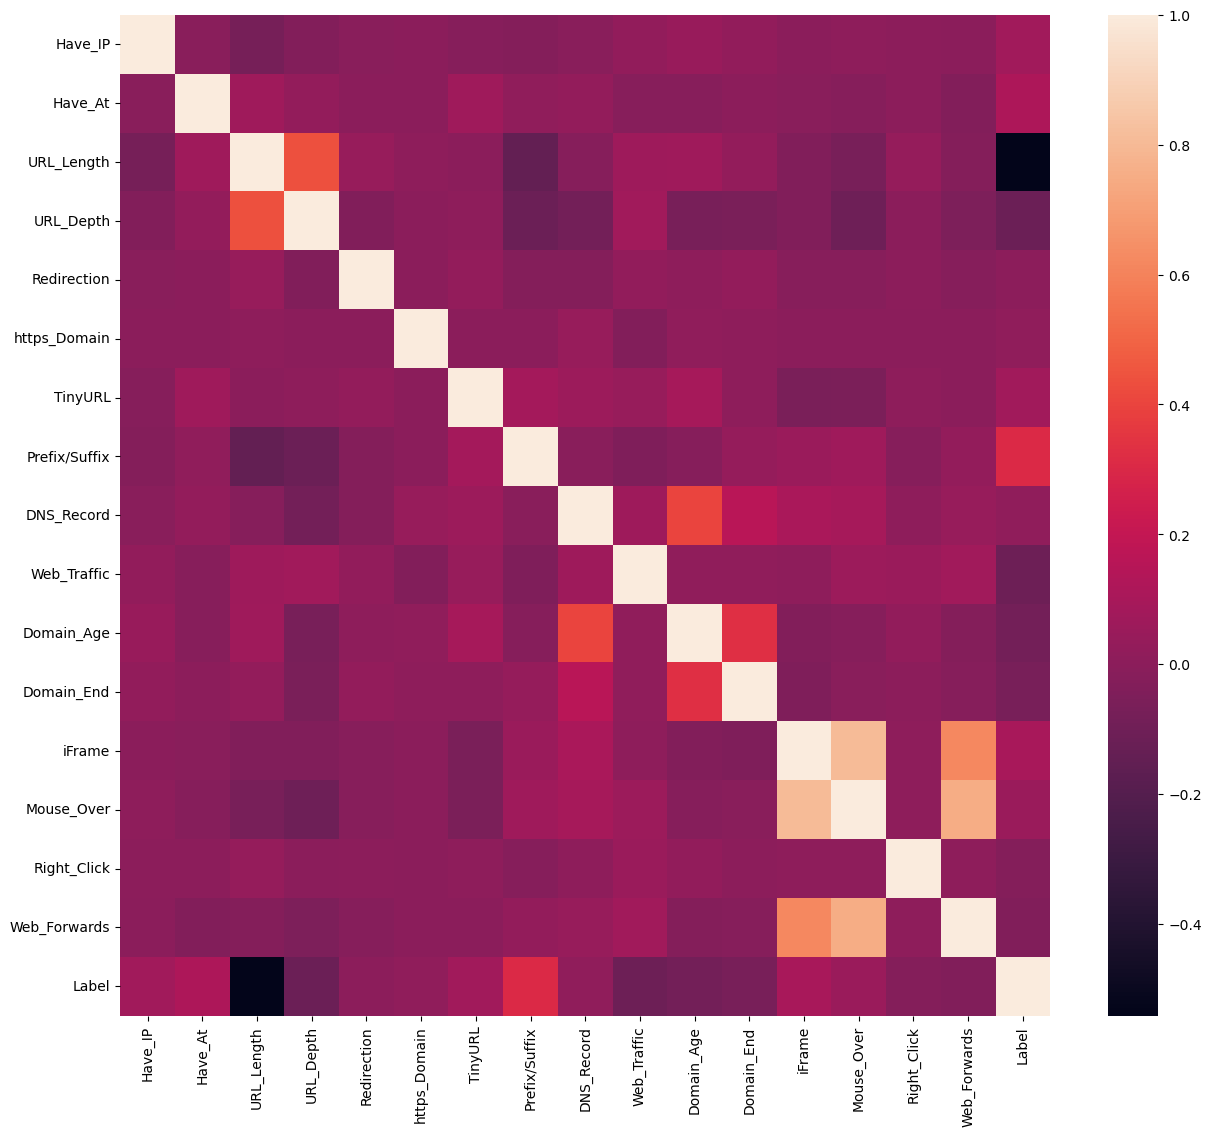

In [18]:
# Correlation heatmap
plt.figure(figsize=(15,13))
sns.heatmap(df.corr())
plt.show()

In [19]:
# Find Correlation between the independent and target columns
df.corr()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
Have_IP,1.000000,-0.011308,-0.076021,-0.030466,-0.008700,-0.001052,-0.023430,-0.023841,-0.011425,0.024279,0.047349,0.018799,-0.004701,0.007251,0.001968,-0.003487,0.074367
Have_At,-0.011308,1.000000,0.067844,0.029944,-0.000297,-0.002151,0.067122,0.018369,0.025073,-0.017002,-0.017072,0.001651,-0.008294,-0.021728,0.004025,-0.030246,0.118419
URL_Length,-0.076021,0.067844,1.000000,0.439378,0.038482,0.007656,-0.005318,-0.146102,-0.019508,0.063717,0.071029,0.028755,-0.039903,-0.068104,0.030833,-0.023651,-0.541287
URL_Depth,-0.030466,0.029944,0.439378,1.000000,-0.040189,-0.000478,0.010980,-0.114919,-0.086073,0.075315,-0.070101,-0.061798,-0.039297,-0.105889,-0.002657,-0.051248,-0.119707
Redirection,-0.008700,-0.000297,0.038482,-0.040189,1.000000,-0.001655,0.026634,-0.025581,-0.027654,0.018784,0.012581,0.025758,-0.012876,-0.017346,0.003096,-0.023193,0.002600
https_Domain,-0.001052,-0.002151,0.007656,-0.000478,-0.001655,1.000000,-0.004456,-0.004534,0.042243,-0.033112,0.016837,0.006852,-0.004472,-0.003778,0.000374,-0.004852,0.014144
TinyURL,-0.023430,0.067122,-0.005318,0.010980,0.026634,-0.004456,1.000000,0.087421,0.059078,0.040888,0.095944,0.006812,-0.062000,-0.054771,0.008339,-0.003508,0.072921
Prefix/Suffix,-0.023841,0.018369,-0.146102,-0.114919,-0.025581,-0.004534,0.087421,1.000000,-0.006793,-0.046843,-0.019954,0.031711,0.050594,0.070263,-0.017527,0.030102,0.302705
DNS_Record,-0.011425,0.025073,-0.019508,-0.086073,-0.027654,0.042243,0.059078,-0.006793,1.000000,0.065776,0.398583,0.162210,0.103266,0.094410,0.008861,0.042050,0.015943
Web_Traffic,0.024279,-0.017002,0.063717,0.075315,0.018784,-0.033112,0.040888,-0.046843,0.065776,1.000000,0.013681,0.015998,0.006990,0.057473,0.051495,0.073485,-0.108793


In [20]:
df.describe()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000
mean,0.005500,0.022600,0.773400,3.072000,0.013500,0.000200,0.090300,0.093200,0.100800,0.845700,0.413700,0.8099,0.090900,0.06660,0.99930,0.105300,0.500000
std,0.073961,0.148632,0.418653,2.128631,0.115408,0.014141,0.286625,0.290727,0.301079,0.361254,0.492521,0.3924,0.287481,0.24934,0.02645,0.306955,0.500025
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.500000
75%,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0000,0.000000,0.00000,1.00000,0.000000,1.000000
max,1.000000,1.000000,1.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.00000,1.00000,1.000000,1.000000


In [21]:
# Check there is null values or not
df.isnull().sum()

Have_IP          0
Have_At          0
URL_Length       0
URL_Depth        0
Redirection      0
https_Domain     0
TinyURL          0
Prefix/Suffix    0
DNS_Record       0
Web_Traffic      0
Domain_Age       0
Domain_End       0
iFrame           0
Mouse_Over       0
Right_Click      0
Web_Forwards     0
Label            0
dtype: int64

In [22]:
# Split the dataset into independent and dependent data
X = df.drop('Label', axis=1)
y = df['Label']

In [23]:
X

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards
0,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0
1,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0
2,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0
3,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0
4,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,5,0,0,1,1,0,1,1,1,0,0,1,0
9996,0,0,1,4,0,0,0,0,0,1,0,1,0,0,1,0
9997,0,1,1,3,0,0,1,0,0,0,1,1,1,0,1,0
9998,0,0,1,5,0,0,1,1,0,1,1,1,0,0,1,0


In [24]:
y

0       0
1       0
2       0
3       0
4       0
       ..
9995    1
9996    1
9997    1
9998    1
9999    1
Name: Label, Length: 10000, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
# train test split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [27]:
X_train.shape

(7500, 16)

In [28]:
X_test.shape

(2500, 16)

In [30]:
y_train.shape

(7500,)

In [31]:
y_test.shape

(2500,)

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
# Standardize the independent features
scaler = StandardScaler()

In [39]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [40]:
X_train_scaled

array([[-0.07681984, -0.15411367,  0.54674146, ..., -0.26409759,
         0.02310017, -0.33898387],
       [-0.07681984, -0.15411367,  0.54674146, ..., -0.26409759,
         0.02310017, -0.33898387],
       [-0.07681984, -0.15411367, -1.82901806, ..., -0.26409759,
         0.02310017, -0.33898387],
       ...,
       [-0.07681984, -0.15411367,  0.54674146, ..., -0.26409759,
         0.02310017, -0.33898387],
       [-0.07681984, -0.15411367,  0.54674146, ..., -0.26409759,
         0.02310017, -0.33898387],
       [-0.07681984, -0.15411367, -1.82901806, ..., -0.26409759,
         0.02310017, -0.33898387]])

In [42]:
X_test_scaled

array([[-0.07681984, -0.15411367, -1.82901806, ..., -0.26409759,
         0.02310017, -0.33898387],
       [-0.07681984, -0.15411367,  0.54674146, ..., -0.26409759,
         0.02310017, -0.33898387],
       [-0.07681984,  6.488717  ,  0.54674146, ..., -0.26409759,
         0.02310017,  2.94999287],
       ...,
       [-0.07681984, -0.15411367, -1.82901806, ..., -0.26409759,
         0.02310017, -0.33898387],
       [-0.07681984, -0.15411367,  0.54674146, ..., -0.26409759,
         0.02310017, -0.33898387],
       [-0.07681984, -0.15411367,  0.54674146, ..., -0.26409759,
         0.02310017, -0.33898387]])

#### Decision Tree Classifier

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
tree = DecisionTreeClassifier()

In [44]:
tree.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [45]:
y_train_pred = tree.predict(X_train_scaled)

In [46]:
y_test_pred = tree.predict(X_test_scaled)

In [47]:
from sklearn.metrics import accuracy_score

In [48]:
# training accuracy
print(accuracy_score(y_train, y_train_pred))

0.8674666666666667


In [49]:
# testing Accuracy
print(accuracy_score(y_test, y_test_pred))

0.8592


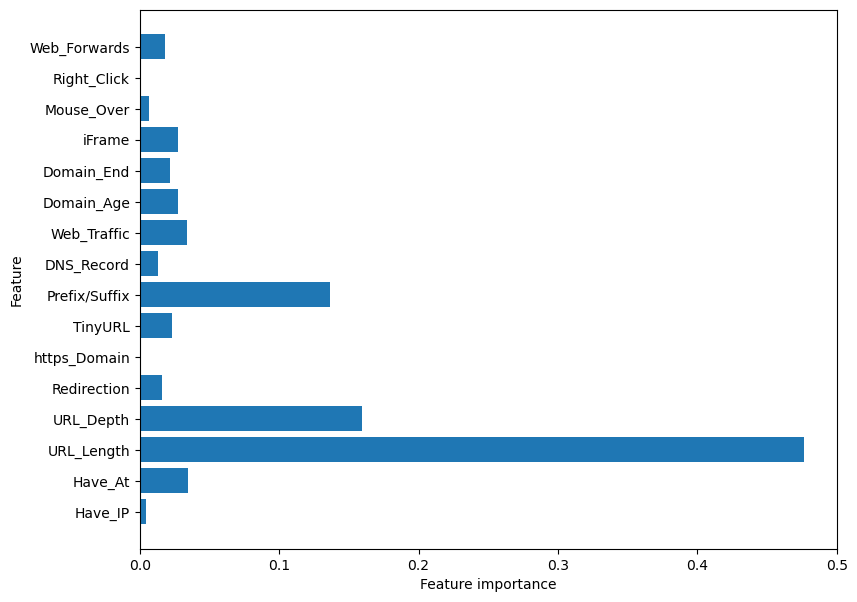

In [50]:
# Checking the feature importance in the model
plt.figure(figsize=(9,7))
n_features = X_train_scaled.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

#### Random Forest Classifier

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
forest = RandomForestClassifier(max_depth=5)

In [55]:
forest.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=5)

In [56]:
y_train_pred = forest.predict(X_train_scaled)

In [57]:
y_test_pred = forest.predict(X_test_scaled) 

In [58]:
# training accuracy
print(accuracy_score(y_train, y_train_pred))

0.8222666666666667


In [59]:
# testing accuracy
print(accuracy_score(y_test, y_test_pred))

0.8168


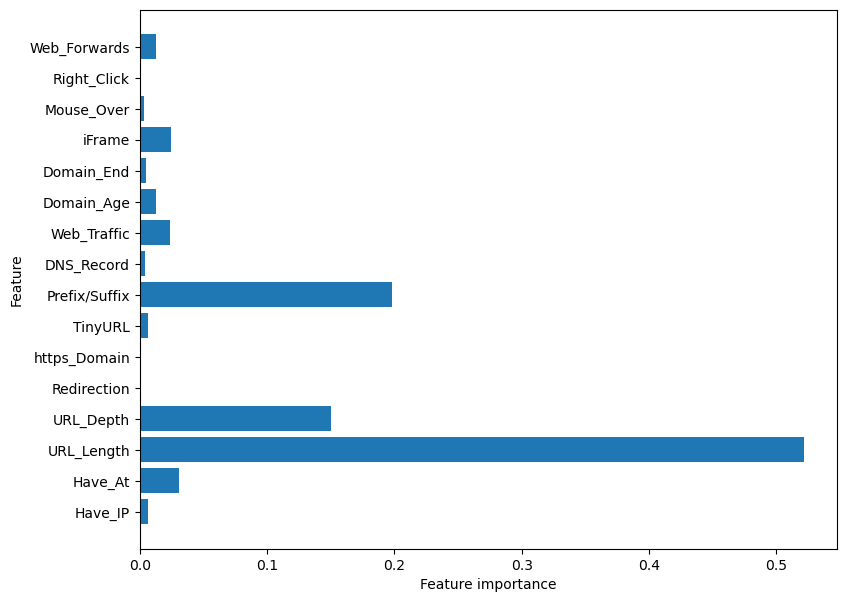

In [60]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

#### Extreme Gradient Boosting Classifier

In [61]:
from xgboost import XGBClassifier

In [63]:
xgb = XGBClassifier(max_depth=7)

In [64]:
xgb.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [65]:
y_train_pred = xgb.predict(X_train_scaled)

In [66]:
y_test_pred = xgb.predict(X_test_scaled) 

In [67]:
# training acuracy 
print(accuracy_score(y_train, y_train_pred))

0.866


In [69]:
# testing accuracy
print(accuracy_score(y_test, y_test_pred))

0.8612


In [70]:
import pickle

In [71]:
pickle.dump(xgb, open('XGBoostClassifier.pkl', 'wb'))

In [72]:
# As XGBoost classifier has high accuracy so pickle this model.
loaded_model = pickle.load(open('XGBoostClassifier.pkl', 'rb'))

In [73]:
loaded_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)